
# Student Placement Prediction using Logistic Regression

**Domain:** Machine Learning / Data Science  
**Task Type:** Binary Classification  
**Algorithm Used:** Logistic Regression  

## Problem Statement
Placements play a crucial role in shaping a student’s career and an institution’s reputation.  
This project builds a machine learning model to predict whether a student will be *Placed* or *Not Placed* based on academic performance and background attributes.

## Objective
- Predict placement status using supervised learning
- Apply a clean end-to-end ML pipeline
- Evaluate model performance using classification metrics and ROC-AUC


In [25]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    roc_auc_score,
    roc_curve,
    auc
)

import matplotlib.pyplot as plt



## Dataset Overview
The dataset contains academic scores, educational background, and work experience details of students along with their placement status.


In [26]:

dataset = pd.read_csv("Placement_Data_Full_Class.csv")
dataset.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,CGPA,degree_t,workex,...,Masters,status,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,...,58.80,Placed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,...,66.28,Placed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,...,57.80,Placed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,...,55.50,Placed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,...,62.14,Placed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



## Data Cleaning
- Remove accidental or irrelevant columns
- Ensure a clean schema before preprocessing


In [27]:

dataset = dataset.loc[:, ~dataset.columns.str.contains("^Unnamed")]
if "sl_no" in dataset.columns:
    dataset.drop(columns=["sl_no"], inplace=True)

dataset.columns


Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'CGPA',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'Masters', 'status'],
      dtype='object')


## Target Variable Analysis
We inspect the placement status labels before encoding to ensure correctness.


In [28]:

dataset["status"].value_counts(dropna=False), dataset["status"].unique()


(status
 Placed        148
 Not Placed     67
 Name: count, dtype: int64,
 array(['Placed', 'Not Placed'], dtype=object))


## Target Encoding
- 1 → Placed
- 0 → Not Placed


In [29]:

dataset["status"] = dataset["status"].map({"Placed": 1, "Not Placed": 0})
dataset["status"].value_counts()


status
1    148
0     67
Name: count, dtype: int64


## Feature Engineering
- Separate features and target to avoid data leakage
- One-hot encode categorical features


In [30]:

X = dataset.drop("status", axis=1)
Y = dataset["status"]

X = pd.get_dummies(X, drop_first=True)
X.head()


,ssc_p,hsc_p,CGPA,etest_p,Masters,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,True,True,True,True,False,False,True,False,True
1,79.33,78.33,77.48,86.5,66.28,True,False,True,False,True,False,True,True,False
2,65.00,68.00,64.00,75.0,57.80,True,False,False,False,False,False,False,False,False
3,85.80,73.60,73.30,96.8,55.50,True,False,False,True,False,False,False,False,False
4,82.00,64.00,66.00,67.0,62.14,True,False,False,False,True,False,True,True,False



## Train–Test Split
We use an 80–20 stratified split to preserve class balance.


In [31]:

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

X_train.shape, X_test.shape


((172, 14), (43, 14))


## Feature Scaling
Standardization ensures all features contribute equally to the model.


In [32]:

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

X_train_scaled.head()


,ssc_p,hsc_p,CGPA,etest_p,Masters,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
106,0.260729,0.694120,-0.166768,0.778647,0.000789,0.685628,-0.910927,-1.315355,0.932505,-0.848528,-0.205971,-0.595257,-0.779408,-0.889757
193,-1.065759,-1.405431,-1.192126,-1.123471,0.074478,0.685628,1.097783,0.760251,0.932505,-0.848528,-0.205971,-0.595257,-0.779408,1.123903
197,-0.664128,-2.212388,-0.678080,-1.359642,0.536711,0.685628,1.097783,0.760251,-1.072381,1.178511,-0.205971,1.679947,-0.779408,1.123903
93,0.712104,-0.857722,-0.576911,0.553721,-0.250425,-1.458517,1.097783,0.760251,-1.072381,1.178511,4.855042,-0.595257,1.283025,-0.889757
18,-0.384091,0.055126,-0.030053,-0.345979,-0.767924,0.685628,1.097783,0.760251,0.932505,-0.848528,-0.205971,-0.595257,-0.779408,1.123903



## Model Training
We train a Logistic Regression classifier with class balancing.


In [33]:

model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train_scaled, Y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter


## Model Evaluation


In [34]:

Y_pred = model.predict(X_test_scaled)
Y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("\nAccuracy:")
print(accuracy_score(Y_test, Y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(Y_test, Y_prob))


Confusion Matrix:
[[12  1]
 [ 5 25]]

Accuracy:
0.8604651162790697

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       0.96      0.83      0.89        30

    accuracy                           0.86        43
   macro avg       0.83      0.88      0.85        43
weighted avg       0.88      0.86      0.86        43


ROC-AUC Score:
0.9358974358974359



## ROC Curve Analysis


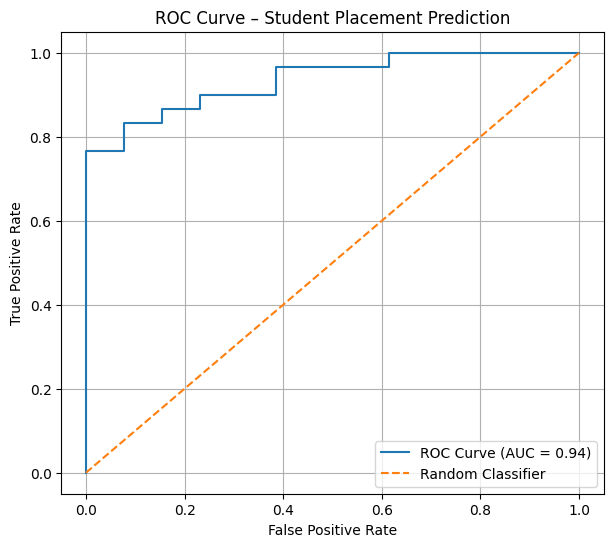

In [35]:

fpr, tpr, _ = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Student Placement Prediction")
plt.legend()
plt.grid(True)
plt.show()



## Placement Prediction for a New Student


In [36]:

feature_names = X_train.columns

sample_student = pd.DataFrame(
    [[87, 79, 8.2, 65, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0]],
    columns=feature_names
)

sample_student_scaled = pd.DataFrame(
    scaler.transform(sample_student),
    columns=feature_names,
    index=sample_student.index
)

prediction = model.predict(sample_student_scaled)
probability = model.predict_proba(sample_student_scaled)[0][1]

print("Placement Prediction:", "Placed" if prediction[0] == 1 else "Not Placed")
print("Placement Probability:", round(probability*100,2), "%")


Placement Prediction: Placed
Placement Probability: 99.96 %



## Conclusion
- Built a complete end-to-end ML classification pipeline
- Achieved strong accuracy and ROC-AUC
- Ensured clean preprocessing and correct inference
- Demonstrated practical applicability through prediction

This project demonstrates foundational machine learning skills suitable for GDSC submissions.
